Food Classificatiom Model Using Conv2D. 

Datase - Food-11 from EPFL research university

ConV 2D Architecture:   

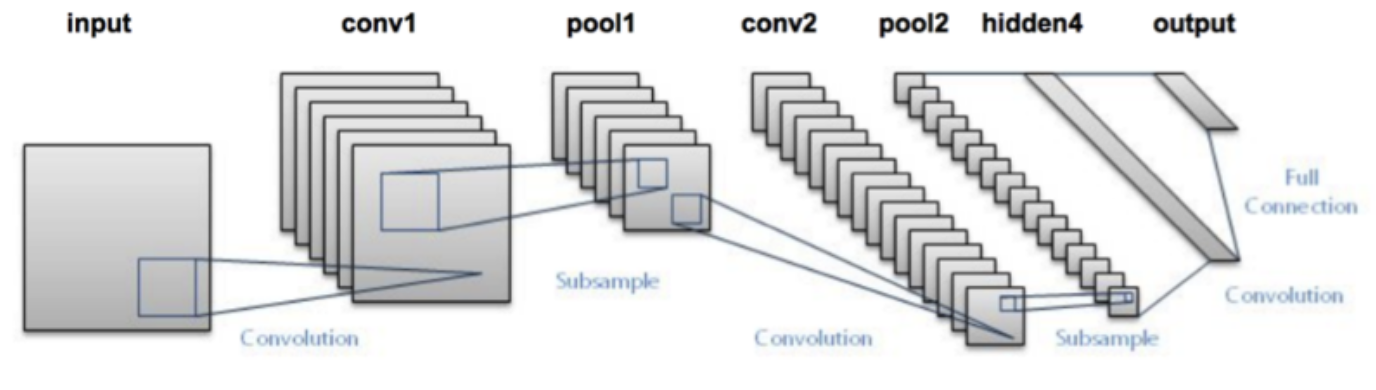

In [ ]:
from __future__ import print_function
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Model for Binary classification

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CMPE258Project_FoodCalorieDetection/evaluation/Train',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CMPE258Project_FoodCalorieDetection/evaluation/Test',
                                            target_size = (100, 100), 
                                            batch_size = 32, 
                                            class_mode = 'categorical')

Found 982 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


1. Import sequential from keras.models.       
  1. To initialize neural network model as a sequential network there are two ways it is either by sequence of layers or as a graph.
2. Import Conv2D from keras.layers. These layers perform the convolution operation. Train the images which is the first step of CNN. As out import to the model is a set images 2D arrays so using 2D Conv 
3. import maxPooling2D from keras.layers. max pooling is used in pooling layer as a second step of building a CNN
4. import flatten from keras.layers for flatenning input. This is a process of converting all the resultant 2D array into a single long continuous linear vector. 
5. Import dense from kera layers. This is used to perform the full connection of the neural network. this is 4th step in the process of building a CNN

In [ ]:
classifier = Sequential()    #Creating an object of the sequential class below


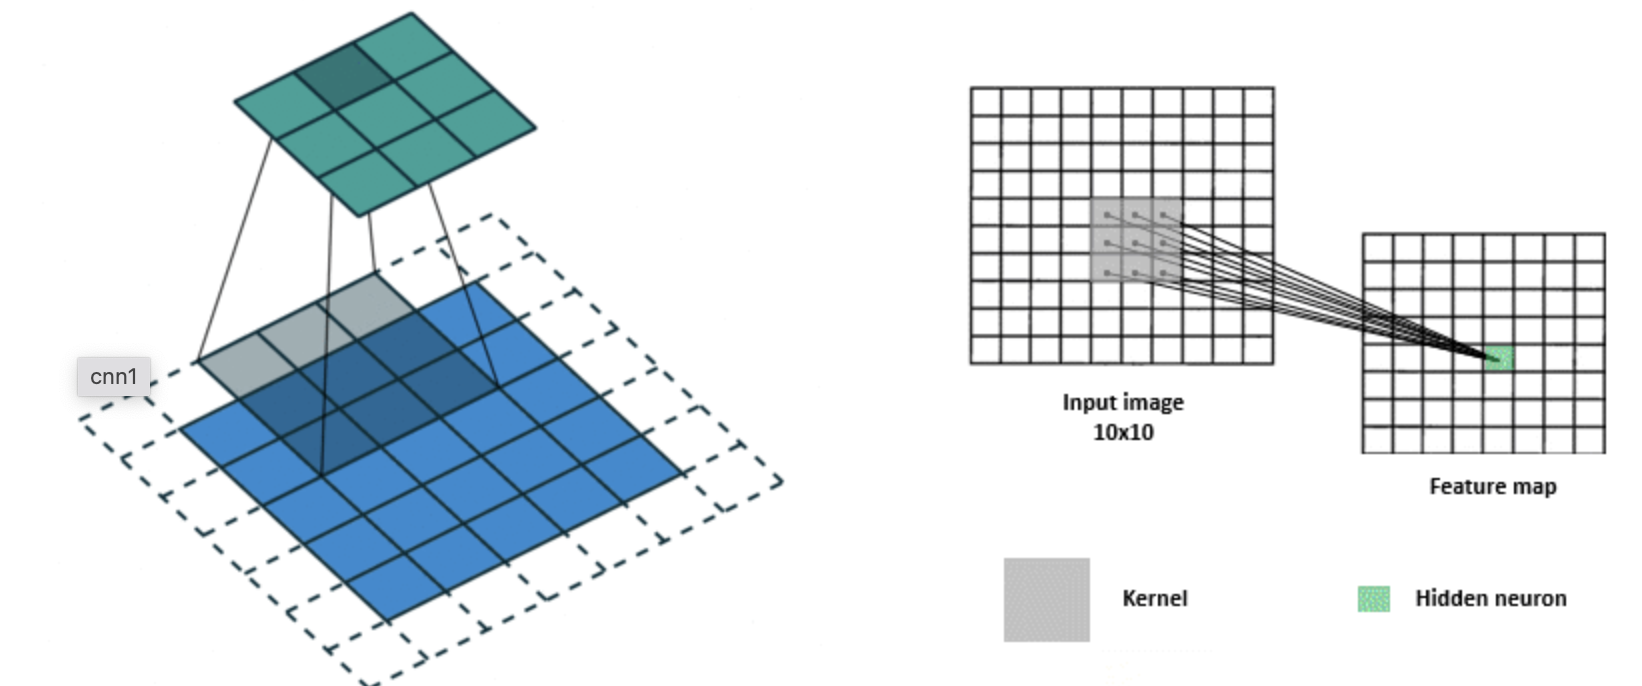

Conv2D function takes four arguments
1. first argument is the number of filters, used 32
2. second argument is the shape each filter, used 3X3
3. third argument is the input shape and type of image i.e, RGB or Black and white
4. fourth argument is the activation function, used 'relu' and it stands for rectifier function.     

Filter used when scanned over the input image gives out the probability of  the image which maps to the class. The filter extract the features from input image. The filter will feature identifier as it will enlighten certain features in the image and other parts has to be darkened resulting a feature map.     
Activation function 'relu' acts as feature rectifier where non linear operations will replace all the negative values from feature map to zero. 

In [ ]:
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (100, 100, 3), activation = 'relu'))


layer adds non-linear properties to model which helps te model to learn more complex features

In [ ]:
classifier.add(Conv2D(32, (3, 3), activation='relu'))


Pooling layer - in CNN will used to reduce the dimentionality of the feature map.    
There different techniques to add pooling layer to the model.   
1. Max pooling
2. Average Pooling
3. Global Pooling

Max pooling is added to CNN. Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter.        

Max pooling layer will reduce the diemntionality of the feature map while retaining feature information. This layer will reduce computationality complexity of the model.    
In our model we have used 2X2 matrix, minimum pixel loss and get a precise region where the feature are location

In [ ]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))


Drop out layer drops certain number of neurons from the previous layer. This will avoid the model from overfitting

In [ ]:
classifier.add(Dropout(0.25))


Adding additional layers to above will help model to detect more complex features

In [ ]:
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

This is the layer where feature map will be flatten.  
add fully connected layer to convert feature map to n-dimentional vector
add final dropout layer

In [ ]:
classifier.add(Flatten())
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.5))

Dense is used to add a fully connected layer, units is where we defie the number of nodes that should be present in this hidden layer and these units value will be always between the number of inpu nodes and the output nodes.    

Final dense which is the fully connected layer converts vector map with numbe of vectors = number of classes model need to classify.  

activation function in the layer used is 'sigmoid', this layer will convert vector map into probability for the number of classes specified. 

In [ ]:
classifier.add(Dense(2, activation='sigmoid'))


compile this model with optimizer, loss function and metrics.   
Model with loss function 'binary_crossentropy' which measures difference between predictions and expected values.     
loss propogates backwards updating weight values to change the direction of gradient to minimize the loss.    
Optimizer use is 'rmsprop' perform gradient descent.    

In [ ]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


summary of model

In [ ]:
print (classifier.summary())

Train model on binary dataset

In [ ]:
classifier.fit_generator(training_set,
steps_per_epoch = 982/32,
epochs = 50,
validation_data = test_set,
validation_steps = 330/32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
30/30 [==============================] - 299s 10s/step - loss: 0.4286 - accuracy: 0.7963 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 2/50
30/30 [==============================] - 56s 2s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.9403e-06 - val_accuracy: 1.0000
Epoch 3/50
30/30 [==============================] - 57s 2s/step - loss: 2.6692e-05 - accuracy: 1.0000 - val_loss: 2.3323e-06 - val_accuracy: 1.0000
Epoch 4/50
30/30 [==============================] - 57s 2s/step - loss: 4.4563e-06 - accuracy: 1.0000 - val_loss: 1.1264e-07 - val_accuracy: 1.0000
Epoch 5/50
30/30 [==============================] - 57s 2s/step - loss: 1.3798 - accuracy: 0.9837 - val_loss: 1.5312e-07 - val_accuracy: 1.0000
Epoch 6/50
30/30 [==============================] - 57s 2s/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 5.8786e-07 - val_accuracy: 1.0000
Epoch 7/50
30/30 [==============================] - 57s 2s/step - loss: 6.3323e-06 - accuracy: 1.0000 - val_loss: 1.5955e-07 - val

Multi class Classification

In [ ]:
## Linear stack of layers
classifier3 = Sequential()   
classifier3.add(Conv2D(32, (3, 3), padding='same', input_shape = (100, 100, 3), activation = 'relu'))
classifier3.add(Conv2D(32, (3, 3), activation='relu'))
classifier3.add(MaxPooling2D(pool_size = (2, 2)))
classifier3.add(Dropout(0.25))

classifier3.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier3.add(Conv2D(64, (3, 3), activation='relu'))
classifier3.add(MaxPooling2D(pool_size = (2, 2)))
classifier3.add(Dropout(0.25))

classifier3.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier3.add(Conv2D(64, (3, 3), activation='relu'))
classifier3.add(MaxPooling2D(pool_size = (2, 2)))
classifier3.add(Dropout(0.25))

classifier3.add(Flatten())
classifier3.add(Dense(units = 512, activation = 'relu'))
classifier3.add(Dropout(0.5))
classifier3.add(Dense(60, activation='softmax'))
classifier3.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Kaggle/60/Training',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Kaggle/60/Testing',
                                            target_size = (100, 100), 
                                            batch_size = 32, 
                                            class_mode = 'categorical')

Found 9100 images belonging to 60 classes.
Found 9673 images belonging to 60 classes.


In [ ]:
print (classifier3.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 98, 98, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 49, 49, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 49, 49, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 47, 47, 64)        36928     
                                                      

Train model on multi class dataset

In [ ]:
classifier3.fit_generator(training_set,
steps_per_epoch = 9100/32,
epochs = 50,
validation_data = test_set,
validation_steps = 9673/32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
284/284 [==============================] - 591s 2s/step - loss: 0.2268 - accuracy: 0.9777 - val_loss: 60.6018 - val_accuracy: 0.3110
Epoch 2/50
284/284 [==============================] - 589s 2s/step - loss: 0.1456 - accuracy: 0.9807 - val_loss: 65.5971 - val_accuracy: 0.3168
Epoch 3/50
284/284 [==============================] - 591s 2s/step - loss: 0.1640 - accuracy: 0.9807 - val_loss: 47.3495 - val_accuracy: 0.3198
Epoch 4/50
284/284 [==============================] - 591s 2s/step - loss: 0.1537 - accuracy: 0.9870 - val_loss: 70.9837 - val_accuracy: 0.3130
Epoch 5/50
284/284 [==============================] - 592s 2s/step - loss: 0.1258 - accuracy: 0.9854 - val_loss: 59.8397 - val_accuracy: 0.3147
Epoch 6/50
284/284 [==============================] - 591s 2s/step - loss: 0.0984 - accuracy: 0.9854 - val_loss: 74.4875 - val_accuracy: 0.3138
Epoch 7/50
284/284 [==============================] - 591s 2s/step - loss: 0.1739 - accuracy: 0.9879 - val_loss: 82.7253 - val_accuracy:

In [ ]:
classifier3.save('Model_ConV2D.h5')